In [254]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression

In [255]:
insurance_original = pd.read_csv("insurance.csv")

insurance = insurance_original.copy()

insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [256]:
insurance.drop_duplicates(inplace=True)

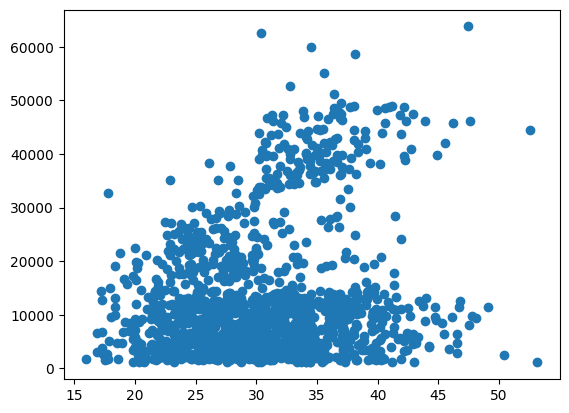

In [257]:
plt.scatter(x=insurance.bmi, y=insurance.charges)

# Show plot
plt.show()

<Axes: >

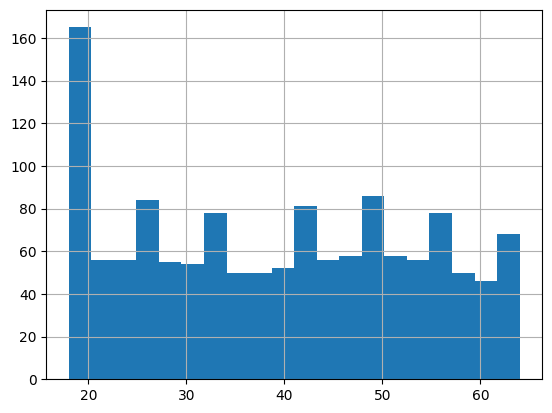

In [258]:
insurance["age"].hist(bins=20)

In [259]:
X = insurance.drop(['charges'], axis=1)
y = insurance['charges']

In [260]:
X.head()

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest


In [261]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [262]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=38)

In [263]:
X_train.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
dtype: int64

In [264]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [265]:
num_col = ["age", "bmi", "children"]
cat_col = ["sex", "smoker", "region"]

print(f"num col:", num_col)
print(f"cat col:", cat_col)

num col: ['age', 'bmi', 'children']
cat col: ['sex', 'smoker', 'region']


In [266]:
X_train_num = X_train[num_col]
X_test_num = X_test[num_col]
X_train_cat = X_train[cat_col]
X_test_cat = X_test[cat_col]

In [267]:
X_train_num.head()

,age,bmi,children
358,23,41.910,0
596,42,29.480,2
578,52,30.200,1
319,32,37.335,1
218,26,29.920,1


In [268]:
X_test_num.head()

,age,bmi,children
1281,47,27.645,2
50,18,35.625,0
1026,19,26.030,1
1322,62,38.830,0
420,64,33.880,0


In [269]:
X_test_cat.head()

,sex,smoker,region
1281,female,yes,northwest
50,female,no,northeast
1026,male,yes,northwest
1322,male,no,southeast
420,male,yes,southeast


In [270]:
print(X_test_cat["sex"].unique())
print(X_test_cat["smoker"].unique())
print(X_test_cat["region"].unique())
X_train_cat.head()

['female' 'male']
['yes' 'no']
['northwest' 'northeast' 'southeast' 'southwest']


,sex,smoker,region
358,male,no,southeast
596,female,no,southeast
578,male,no,southwest
319,male,no,northeast
218,female,no,southeast


In [271]:
encoder = OneHotEncoder(categories=[['female', 'male'], # Untuk col 1
                                    ['yes', 'no'], # Untuk col 2
                                    ['northwest', 'northeast', 'southeast', 'southwest']]) # Untuk col 3

encoder.fit(X_train_cat)
X_train_cat_encoded = encoder.transform(X_train_cat)
X_test_cat_encoded = encoder.transform(X_test_cat)

In [272]:
print(X_train_cat_encoded.toarray())

[[0. 1. 0. ... 0. 1. 0.]
 [1. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 0. 1.]
 ...
 [0. 1. 1. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 1. 0.]]


In [273]:
# X_train_num["children"] = np.log(X_train_num["children"] + 1)
print(X_train_num["age"].skew())
print(X_train_num["bmi"].skew())
print(X_train_num["children"].skew())

0.04263165532405134
0.29547784455832493
0.8465908566922766


In [274]:
scaler = StandardScaler()
X_train_num_scaled = scaler.fit_transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)

In [275]:
X_test_num_scaled

array([[ 0.54989647, -0.50373066,  0.75360455],
       [-1.53584842,  0.81146623, -0.93191277],
       [-1.46392619, -0.76990145, -0.08915411],
       ...,
       [-0.5289371 ,  1.71380995, -0.93191277],
       [-0.38509262,  2.0104709 , -0.08915411],
       [-1.46392619,  0.60957197, -0.93191277]])

In [276]:
X_train_final = np.concatenate([X_train_cat_encoded.toarray(), X_train_num_scaled], axis=1)
X_test_final = np.concatenate([X_test_cat_encoded.toarray(), X_test_num_scaled], axis=1)
X_train_final

array([[ 0.        ,  1.        ,  0.        , ..., -1.17623724,
         1.84730738, -0.93191277],
       [ 1.        ,  0.        ,  0.        , ...,  0.19028528,
        -0.2013013 ,  0.75360455],
       [ 0.        ,  1.        ,  0.        , ...,  0.90950766,
        -0.08263692, -0.08915411],
       ...,
       [ 0.        ,  1.        ,  1.        , ...,  1.48488556,
         1.68414386, -0.93191277],
       [ 0.        ,  1.        ,  0.        , ...,  0.76566318,
         0.24781042, -0.93191277],
       [ 0.        ,  1.        ,  1.        , ..., -0.24124814,
         0.61451632, -0.93191277]])

In [277]:
model_linear = LinearRegression()
model_linear.fit(X_train_final, y_train)

LinearRegression()

In [278]:
y_pred_train = model_linear.predict(X_train_final)
y_pred_test = model_linear.predict(X_test_final)

print(y_pred_train)
print(y_pred_test)

[ 7168.  8424. 11088. ... 40576. 11616. 32240.]
[ 3.4216e+04  4.7840e+03  2.6272e+04  1.6088e+04  3.9216e+04  1.1232e+04
  2.1600e+03  3.3064e+04  8.4800e+03  4.2080e+03  3.3720e+04  7.6240e+03
  5.8320e+03  8.3680e+03  1.6048e+04  2.8704e+04  3.0464e+04  1.3184e+04
  1.3024e+04  1.0792e+04  3.0352e+04  3.7512e+04  2.9120e+03  1.2560e+04
  8.9280e+03  3.2480e+03  1.0576e+04  1.0544e+04  6.3840e+03  1.4728e+04
  7.3680e+03  6.0480e+03  1.9360e+03  9.9200e+03  3.3520e+03  1.1248e+04
  6.7280e+03  1.0800e+04  1.0464e+04  3.1800e+04  2.0800e+03  2.7840e+04
  1.0992e+04  3.1488e+04  1.5344e+04  2.6880e+03  3.5040e+03  2.4600e+04
  4.9600e+02  5.0160e+03  7.2560e+03  8.4160e+03  5.3280e+03  7.4240e+03
  8.0320e+03  6.3200e+03  6.0160e+03  3.2000e+04  3.9680e+03  1.7808e+04
  3.6000e+04  1.3368e+04  1.1784e+04  2.3800e+04  5.1680e+03  1.9440e+03
  3.9376e+04  1.3784e+04  1.2232e+04  5.7600e+03  6.4480e+03  3.9360e+03
  8.5680e+03  4.4560e+03  1.2360e+04 -2.0960e+03  3.7848e+04  2.8840e+04
  2

In [279]:
y_train

358      1837.28190
596      7640.30920
578      9724.53000
319      4667.60765
218      3392.97680
           ...     
738     36189.10170
1283     1720.35370
901     48673.55880
316      8835.26495
53      37742.57570
Name: charges, Length: 1002, dtype: float64

In [280]:
from sklearn.metrics import mean_absolute_error

# Evaluate the model
print('Error - train:', mean_absolute_error(y_train, y_pred_train))
print('Error - test:', mean_absolute_error(y_test, y_pred_test))

Error - train: 4150.020402344311
Error - test: 4173.835684985074


In [283]:
X_train_num_scaled

array([[-1.17623724,  1.84730738, -0.93191277],
       [ 0.19028528, -0.2013013 ,  0.75360455],
       [ 0.90950766, -0.08263692, -0.08915411],
       ...,
       [ 1.48488556,  1.68414386, -0.93191277],
       [ 0.76566318,  0.24781042, -0.93191277],
       [-0.24124814,  0.61451632, -0.93191277]])

In [285]:
X_train_num

,age,bmi,children
358,23,41.910,0
596,42,29.480,2
578,52,30.200,1
319,32,37.335,1
218,26,29.920,1
...,...,...,...
738,23,31.730,3
1283,18,30.030,1
901,60,40.920,0
316,50,32.205,0


In [284]:
from sklearn.ensemble import RandomForestRegressor
list_fs= ['age', 'bmi', 'children', 'smoker']
X_train_fs= X_train_num[list_fs]
X_test_fs= X_test_num[list_fs]


rf= RandomForestRegressor()
rf.fit(X_train_fs, y_train)

KeyError: "['smoker'] not in index"